In [ ]:
# import required packages
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [ ]:
# Load the IMD dataset
imd_data = pd.read_csv('English_imd_2019_london.csv')

# Load the Education dataset
Qulifications_data = pd.read_csv('qulifications_London.csv')

# Load the London dataset
london_shp = gpd.read_file('LSOA_2011_London_gen_MHW.shp')

In [ ]:
# Exploratory Data Description
print(imd_data.head())
print(imd_data.info())
print(Qulifications_data.head())
print(Qulifications_data.info())
print(london_shp.head())
print(london_shp.info())

#Check for Missing Values
print(imd_data.isnull().sum())
print(Qulifications_data.isnull().sum())
print(london_shp.isnull().sum())

    lsoa11cd                  la11nm  england_imd_rank  england_imd_decile  \
0  E01002082                Haringey               546                   1   
1  E01002857  Kensington and Chelsea              1012                   1   
2  E01001178                 Croydon              1096                   1   
3  E01000601                   Brent              1192                   1   
4  E01002853  Kensington and Chelsea              1212                   1   

   london_imd_rank  london_imd_decile  
0                1                  1  
1                2                  1  
2                3                  1  
3                4                  1  
4                5                  1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lsoa11cd            4835 non-null   object
 1   la11nm              4835 non-null   

After exploring the datasets, we can know that there is no null value in the datasets. Then, dropping unnecessary columns. In this project, we only discuss the relationship between IMD and education so that the data of types of students can be dropped in qualification dataset. Meanwhile, some name of columns is too long to read, rename them as a readable one. Additionally, dropping the data which do not have to be considered.

In [ ]:
# Drop unnecessary columns
Qulifications_data = Qulifications_data.drop(columns =[
    'Qualifications: Schoolchildren and full-time students: Age 16 to 17; measures: Value',
    'Qualifications: Schoolchildren and full-time students: Age 18 and over; measures: Value',
    'Qualifications: Full-time students: Age 18 to 74: Economically active: In employment; measures: Value',
    'Qualifications: Full-time students: Age 18 to 74: Economically active: Unemployed; measures: Value',
    'Qualifications: Full-time students: Age 18 to 74: Economically inactive; measures: Value'])
Qulifications_data.columns

london_shp = london_shp.drop(columns =[
    'USUALRES',
    'HHOLDRES',
    'COMESTRES',
    'POPDEN',
    'HHOLDS',
    'AVHHOLDSZ',
])
london_shp.columns


# Rename columns for better readability
Qulifications_data = Qulifications_data.rename(columns={
    'Qualifications: All categories: Highest level of qualification; measures: Value': 'Total_Qualifications',
    'Qualifications: No qualifications; measures: Value': 'No_Qualifications',
    'Qualifications: Highest level of qualification: Level 1 qualifications; measures: Value': 'Level_1_Qualifications',
    'Qualifications: Highest level of qualification: Level 2 qualifications; measures: Value': 'Level_2_Qualifications',
    'Qualifications: Highest level of qualification: Apprenticeship; measures: Value': 'Apprenticeship',
    'Qualifications: Highest level of qualification: Level 3 qualifications; measures: Value': 'Level_3_Qualifications',
    'Qualifications: Highest level of qualification: Level 4 qualifications and above; measures: Value': 'Level_4_Qualifications',
    'Qualifications: Highest level of qualification: Other qualifications; measures: Value': 'Other_Qualifications'

})

By exploring the datasets, we can know that the three datasets can be joined by 'lsoa11cd' and 'LSOA11CD'

In [ ]:
# join data by column 'Isoa11cd'
merged_data = pd.merge(Qulifications_data, imd_data, on='lsoa11cd')
joined_data = imd_data.merge(london_shp, left_on='lsoa11cd', right_on='LSOA11CD')

# Check and deal with data
merged_data.dropna(inplace=True)
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   lsoa11cd            4835 non-null   object  
 1   la11nm              4835 non-null   object  
 2   england_imd_rank    4835 non-null   int64   
 3   england_imd_decile  4835 non-null   int64   
 4   london_imd_rank     4835 non-null   int64   
 5   london_imd_decile   4835 non-null   int64   
 6   LSOA11CD            4835 non-null   object  
 7   LSOA11NM            4835 non-null   object  
 8   MSOA11CD            4835 non-null   object  
 9   MSOA11NM            4835 non-null   object  
 10  LAD11CD             4835 non-null   object  
 11  LAD11NM             4835 non-null   object  
 12  RGN11CD             4835 non-null   object  
 13  RGN11NM             4835 non-null   object  
 14  geometry            4835 non-null   geometry
dtypes: geometry(1), int64(4), object(10)
m

Use the Spearman's rank correlation to quantify the association between IMD rank and educational qualifications.

In [ ]:
# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(merged_data['london_imd_rank'], merged_data['Total_Qualifications'])

print(f"Spearman's rank correlation: {correlation}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation between isolation rank and qualification level.")
else:
    print("There is no statistically significant correlation.")

Spearman's rank correlation: 0.011180619928839482, p-value: 0.43700636904314594
There is no statistically significant correlation.


The results show above which indicate there is no statistically significant correlation between IMD rank and educational qualifications.


Then we create a boxplot to study the relationship between IMD rank and the people who are uneducated.

<ipython-input-17-654408e17679>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


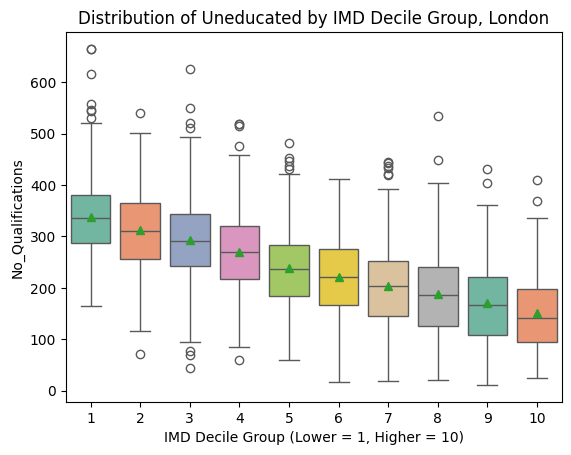

In [ ]:
# Boxplot with colorblind-friendly palette
sns.boxplot(
   x="london_imd_decile",
   y="No_Qualifications",
   showmeans=True,
   palette="Set2",
   data=merged_data
)

# set labels and title
plt.xlabel("IMD Decile Group (Lowest = 1, Highest = 10)")
plt.ylabel("No_Qualifications")
plt.title("Distribution of Uneducated by IMD Decile Group, London")
plt.show()

Though the Spearman's rank correlation shows no statistically significant correlation between IMD rank and educational qualifications, the boxplot clearly illustrates that as the deprivation index decreases, so does the number of people with no education. The result may indicate that education will influence the deprivation.

As for geospatial visualisation, we create a GeoDataFrame object from the merged data (joined_data), converting it to a geospatial dataframe and setting the 'geometry' column as the geometry column for spatial analysis.

Creating a choropleth map which can effectively communicates the spatial distribution of IMD across London. Also, choosing colour that is suitable for colourblind audiences and creating a colourbar as legend that indicates the range of IMD from the most deprivation to the least deprivation.
Even no background knowledge audiences can understand the distribution of IMD in London easily.

<ipython-input-21-2155f40d30e8>:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='IMD Decile (from Most to Least)')


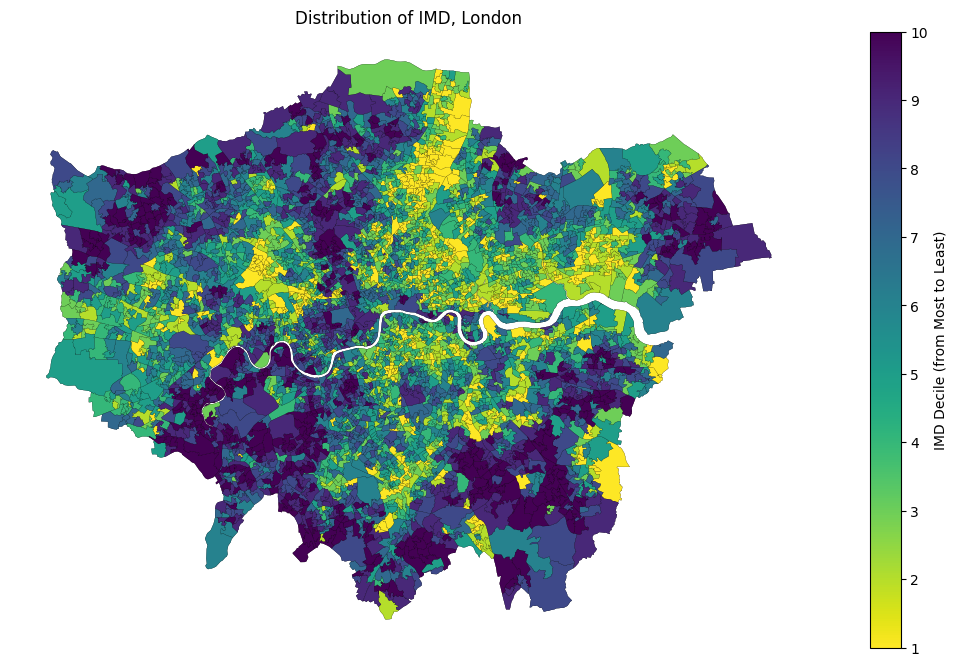

In [ ]:
# Create a GeoDataFrame object from the merged data (joined_data)
geodata = gpd.GeoDataFrame(joined_data, geometry=joined_data['geometry'])
london_imd_decile = geodata['london_imd_decile']

# Extract the 'london_imd_decile' column from the geodata DataFrame
london_imd_decile = geodata['london_imd_decile']


# Create GeoDataFrame with explicit CRS
crs = {'init': 'epsg:27700'}
geodata = gpd.GeoDataFrame(joined_data, geometry=joined_data['geometry'], crs=crs)


# Create suitable colormap
fig, ax = plt.subplots(1, figsize=(16,8))
geodata.plot(ax=ax, column='london_imd_decile', cmap='viridis_r', edgecolor='black', linewidth=0.1)

# Create color normalization
norm = Normalize(vmin=min(geodata['london_imd_decile']), vmax=max(geodata['london_imd_decile']))

# Plot with colormap
geodata.plot(ax=ax, column='london_imd_decile', cmap='viridis_r', edgecolor='black', linewidth=0.1, norm=norm)

# Create colorbar as legend
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='IMD Decile (Most = 1, Least = 10)')


# remove axis
ax.set_axis_off()

# set a suitable title
ax.set_title('Distribution of IMD, London')

plt.show()